In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('UIPA.HMD8310H.Engine1_(20240715_235500)_(20240716_062559)_physics_upsampled.csv')
df['time'] = pd.to_datetime(df['time'])

cols = df.columns
for c in cols:
    print(c)

time
name
aIAirTemperatureTCInlet
aIBaseDurationGasAdmission
aIChargeAirPressureEngineInlet
aIChargeAirSetpointBarMPa
aIChargeAirTemperatureEngineInlet
aICounterStarts
aICounterStartsX10000
aICrankcasePressure
aICyclicSlowTurningResult
aICyclicSlowTurningState
aIDVTControlAirPressure
aIDurationOffsetGasAdmissionCylinderA01
aIDurationOffsetGasAdmissionCylinderA02
aIDurationOffsetGasAdmissionCylinderA03
aIDurationOffsetGasAdmissionCylinderA04
aIDurationOffsetGasAdmissionCylinderA05
aIDurationOffsetGasAdmissionCylinderA06
aIDurationOffsetGasAdmissionCylinderA07
aIDurationOffsetGasAdmissionCylinderA08
aIDurationOffsetGasAdmissionCylinderA09
aIDurationOffsetPilotInjectionCylinderA01
aIDurationOffsetPilotInjectionCylinderA02
aIDurationOffsetPilotInjectionCylinderA03
aIDurationOffsetPilotInjectionCylinderA04
aIDurationOffsetPilotInjectionCylinderA05
aIDurationOffsetPilotInjectionCylinderA06
aIDurationOffsetPilotInjectionCylinderA07
aIDurationOffsetPilotInjectionCylinderA08
aIDurationOffsetPil

Steady-state 상태 전처리 필수  
로드>0 & 스피드>0 & 로드>700  
연료 & DVT ON/OFF 에 따라 DataFrame 분리  
시간차에 따른 그룹화  

In [ ]:
## aIFuelModeActive: 2-DEISEL, 3-GAS
## aIDVTControlAirPressure: =<6-DVTOFF, >6-DVTON

i_diesel = df['aIFuelModeActive']==2
i_gas = df['aIFuelModeActive']==3
i_dvton = df['aIDVTControlAirPressure']<=6
i_dvtoff = ~i_dvton 

df['State'] = 'DIESEL_DVTOFF'
df.loc[i_diesel & i_dvton, 'State'] = 'DIESEL_DVTON'
df.loc[i_gas & i_dvtoff, 'State'] = 'GAS_DVTOFF'
df.loc[i_gas & i_dvton, 'State'] = 'GAS_DVTON'

(1146, 700)
(2036, 700)
(16582, 700)
(3637, 700)


데이터프레임 정보:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23401 entries, 0 to 23400
Columns: 700 entries, time to dIYardMainGasValveClosedInGasOperationGasTrip
dtypes: bool(548), datetime64[ns, UTC](1), float64(82), int64(68), object(1)
memory usage: 39.4+ MB

데이터프레임 기본 통계량:


,aIAirTemperatureTCInlet,aIBaseDurationGasAdmission,aIChargeAirPressureEngineInlet,aIChargeAirSetpointBarMPa,aIChargeAirTemperatureEngineInlet,aICounterStarts,aICounterStartsX10000,aICrankcasePressure,aICyclicSlowTurningResult,aICyclicSlowTurningState,...,aITimingOffsetPilotInjectionCylinderA01,aITimingOffsetPilotInjectionCylinderA02,aITimingOffsetPilotInjectionCylinderA03,aITimingOffsetPilotInjectionCylinderA04,aITimingOffsetPilotInjectionCylinderA05,aITimingOffsetPilotInjectionCylinderA06,aITimingOffsetPilotInjectionCylinderA07,aITimingOffsetPilotInjectionCylinderA08,aITimingOffsetPilotInjectionCylinderA09,aIWasteGateValvePositionCommand
count,23401.000000,23401.000000,23401.000000,23401.000000,23401.000000,23401.000000,23401.0,23401.000000,23401.0,23401.0,...,23401.0,23401.0,23401.0,23401.0,23401.0,23401.0,23401.0,23401.0,23401.0,23401.000000
mean,36.156325,38.004968,2.077047,2.119222,43.641539,997.978206,0.0,0.335022,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.379556
std,2.106174,15.637328,0.476696,0.435738,1.759094,0.146013,0.0,0.429238,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.827250
min,30.042884,-1.351093,0.858736,0.970000,34.733316,997.000000,0.0,-1.221646,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,35.478860,41.032788,1.679473,1.812667,42.996804,998.000000,0.0,0.124134,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.270000
50%,36.793829,44.426283,2.334053,2.356000,44.328228,998.000000,0.0,0.428994,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,31.940000
75%,37.423205,46.073534,2.401790,2.398667,44.624502,998.000000,0.0,0.608696,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.100000
max,41.757807,52.573388,2.614497,2.820000,45.477511,998.000000,0.0,1.506129,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.000000



컬럼별 결측치 개수:
time                                             0
name                                             0
aIAirTemperatureTCInlet                          0
aIBaseDurationGasAdmission                       0
aIChargeAirPressureEngineInlet                   0
                                                ..
dITurningGearEngagedSB                           0
dIUPSAlarmAlarm                                  0
dIWastegateDriverFailureAlarm                    0
dIWireBreakEmergencyStopFromRemote2Alarm         0
dIYardMainGasValveClosedInGasOperationGasTrip    0
Length: 700, dtype: int64
aIAirTemperatureTCInlet
aIBaseDurationGasAdmission
aIChargeAirPressureEngineInlet
aIChargeAirSetpointBarMPa
aIChargeAirTemperatureEngineInlet
aICounterStarts
aICounterStartsX10000
aICrankcasePressure
aICyclicSlowTurningResult
aICyclicSlowTurningState
aIDVTControlAirPressure
aIDurationOffsetGasAdmissionCylinderA01
aIDurationOffsetGasAdmissionCylinderA02
aIDurationOffsetGasAdmissionCylinderA03
aIDur

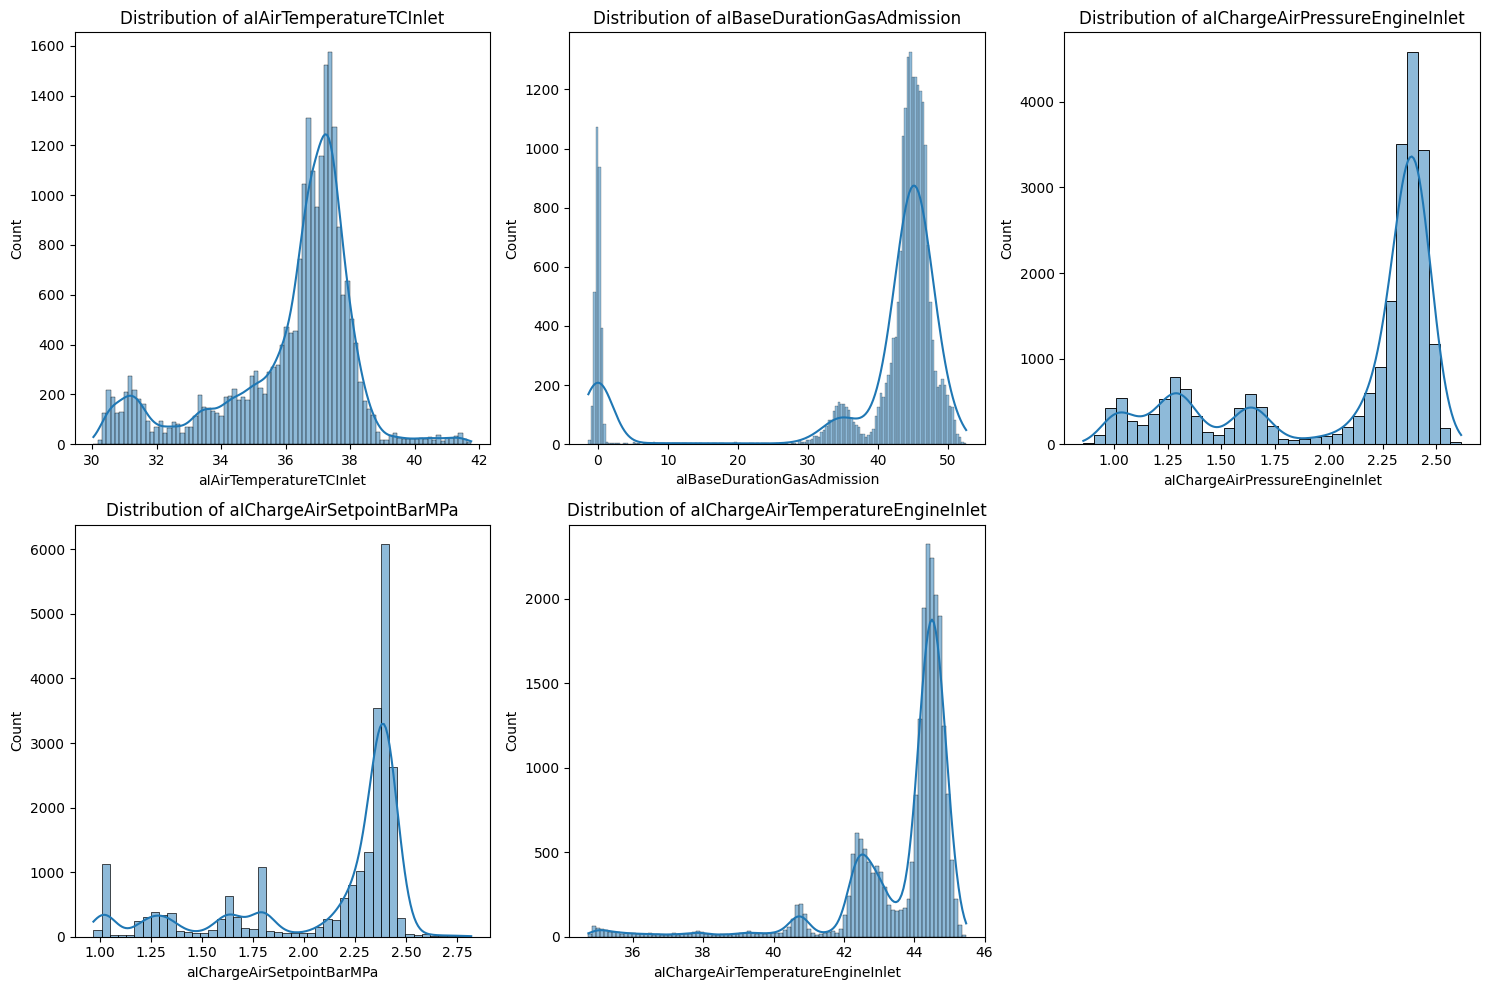

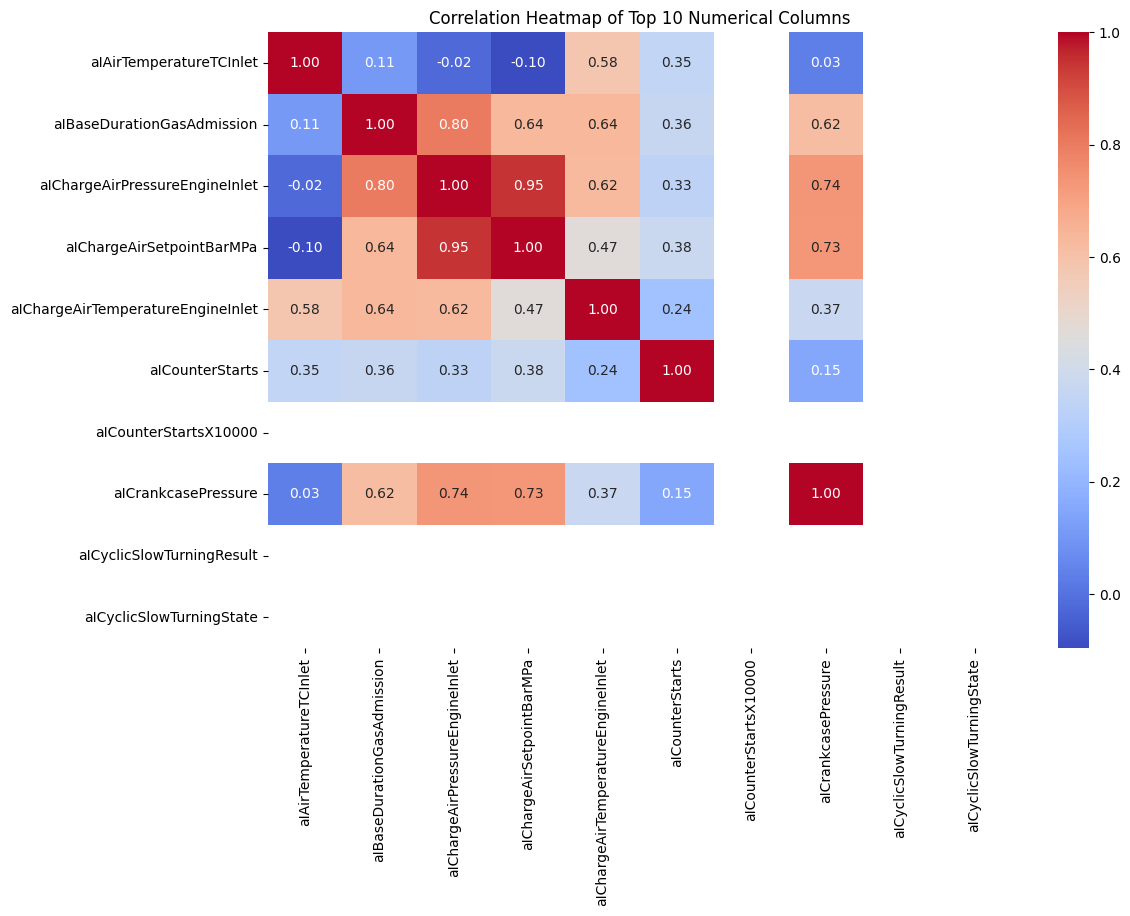

In [ ]:
# 데이터프레임 정보 확인
print("데이터프레임 정보:")
df.info()

print("\n데이터프레임 기본 통계량:")
display(df.describe())

# 결측치 확인
print("\n컬럼별 결측치 개수:")
print(df.isna().sum().sort_values(ascending=False))

# 숫자형 컬럼 선택
num_cols = df.select_dtypes(include=np.number).columns.tolist()
for c in num_cols:
    print(c)

# 주요 숫자형 컬럼 분포 시각화 (예시로 처음 5개 컬럼)
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:5]):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# 상관 관계 히트맵 (예시로 처음 10개 숫자형 컬럼)
plt.figure(figsize=(12, 8))
sns.heatmap(df[num_cols[:10]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Top 10 Numerical Columns')
plt.show()

In [6]:
target_column = 'aIExhaustGasTemperatureTCInlet'